In [9]:
from scipy.stats import shapiro
from scipy import stats
import pandas as pd
import numpy as np
import scipy
from scipy.stats import bartlett
from statsmodels.stats.proportion import proportions_ztest이다

# 265 page

In [10]:
df = pd.read_csv('/home/piai/test/1. Big_Data_분석기초/2sample_t_test.csv', encoding='cp949')

In [11]:
df

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [12]:
df = df.dropna()

1) Mat_A

- H0 : Mat_A는 정규분포를 따른다.
- H1 : Mat_A는 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [13]:
Mat_A_data = df['Mat_A']
shapiro(Mat_A_data)
statistic, p = stats.shapiro(Mat_A_data)

print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9062636494636536, p-value=0.2562994360923767


- p-value가 0.256으로 0.05보다 크므로 귀무가설 채택
- 변수 Mat_A는 정규분포를 따른다. 

2) Mat_B

- H0 : Mat_B는 정규분포를 따른다.
- H1 : Mat_B는 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [14]:
Mat_B_data = df['Mat_B']
shapiro(Mat_B_data)
statistic, p = stats.shapiro(Mat_B_data)

print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9729753732681274, p-value=0.9169777035713196


- p-value가 0.916으로 0.05보다 크므로 귀무가설 채택
- 변수 Mat_B는 정규분포를 따른다. 

# 268 page

In [91]:
df = pd.DataFrame({'sample' : [18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                              22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})

display(df.head())

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print('신뢰구간: ({0}, {1})'.format(lower.round(2)[0], upper.round(2)[0]))

,sample
0,18
1,18
2,20
3,21
4,20


신뢰구간: (17.83, 21.17)


- 신품종 감자의 평균무게에 대한 95% 신뢰구간은 (17.83, 21.17) 이다.

# 271 page

In [15]:
df = pd.DataFrame({'sample' : [73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                              70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})

display(df.head())

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 1.933/np.sqrt(20))
print('신뢰구간: ({0}, {1})'.format(lower.round(2), upper.round(2)))

,sample
0,73
1,71
2,74
3,69
4,70


신뢰구간: ([70.65], [72.35])


# 296 page

- H0 : 개선활동이 만족도를 변화시키지 못한다.
- H1 : 개선활동이 만족도를 변화시킨다.

(유의수준은 0.05라고 가정)

In [16]:
df = pd.DataFrame({'sample' : [85.0, 79.0, 79.1, 79.9, 81.6,
                              78.6, 85.4, 83.4, 78.1, 79.2]})

display(df.head())

t_result = stats.ttest_1samp(df, 78)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('1-Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value : {}'.format(p))

,sample
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


-  유의수준 5%에서 p-value가 0.008로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 이것으로 개선활동이 고객 만족도 변화를 시켰다고 할 수 있으며 t통계량이 0보다 크므로 개선활동이 만족도를 높였다고 할 수 있다.

# 299 page

<AxesSubplot:>

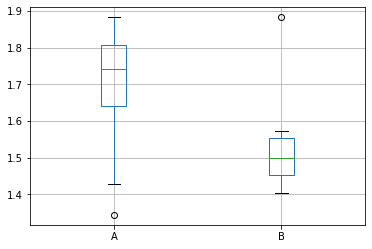

In [17]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                  'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

df.boxplot(['A', 'B'])

#### 1. 정규성 검정

1) 공급자 A의 제품

- H0 : 공급자 A의 제품은 정규분포를 따른다.
- H1 : 공급자 A의 제품은 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [18]:
statistic, p = stats.shapiro(df['A'])
print("statistic = {}, p-value={}".format(statistic, p))

statistic = 0.8425756096839905, p-value=0.08004552870988846


- p-value가 0.08으로 0.05보다 크므로 귀무가설 채택
- 공급자 A의 제품은 정규분포를 따른다.

2) 공급자 B의 제품

- H0 : 공급자 B의 제품은 정규분포를 따른다.
- H1 : 공급자 B의 제품은 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [19]:
statistic, p = stats.shapiro(df['B'])
print("statistic = {}, p-value={}".format(statistic, p))

statistic = 0.7734811902046204, p-value=0.014793740585446358


- p-value가 0.014으로 0.05보다 작으므로 대립가설 채택
- 공급자 B의 제품은 정규분포를 따르지 않는다.

!!공급자 B의 제품은 정규분포를 따르지 않지만 정규분포를 따른다고 가정하고 등분산성 검정!!

- H0 : A 제품은과 B제품은 등분산성을 따른다.
- H1 : A 제품은과 B제품은 등분산성을 따르지 않는다.

#### 2. 등분산성 검정

In [20]:
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=0.42411436523132123, pvalue=0.5148911629500761)

- p-value가 0.51으로 0.05보다 크므로 등분산성을 따르는 것을 알 수 있다.

#### 3. 2-Sample t-test

- H0 : A 제품과 B제품은 같다.
- H1 : A 제품과 B제품은 같지 않다.

(유의수준은 0.05라고 가정)

In [21]:
t_result = stats.ttest_ind(df['A'], df['B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('2-Sample t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

2-Sample t-test
t: 1.7
p: 0.111


- 유의수준 5%에서 검정결과 p값이 0.111이고 0.05보다 크므로 귀무가설을 채택한다. A제품과 B제품은 같다.

# 302 page

- H0 : 회사원들의 성적은 학원가기 전후가 같다.
- H1 : 회사원들의 성적은 학원가기 전후가 차이가 있다.

(유의수준은 0.05라고 가정)

In [23]:
df1 = pd.DataFrame({'before' : [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'After' : [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

In [24]:
t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('Paired t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

Paired t-test
t: [-2.266]
p: [0.05]


- p-value가 0.05이므로 귀무가설을 기각하고 대립가설을 채택한다. 회사원들의 성적은 학원가기 전후가 차이가 있으며 학원을 가고 난 후 성적이 더 오른다고 볼 수 있다. 

# 307 page

- H0 : 동전이 정상적이다.
- H1 : 동전이 비정상적이다. 

(유의수준은 0.05라고 가정)

In [25]:
count = 40
n_obs = 100
value = 0.5

stat,pval = proportions_ztest(count, n_obs, value)

In [26]:
print("1 proportions test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

1 proportions test
z:-2.041
p:0.041


- p-value가 0.041으로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 해당 동전은 비정상적이다.

# 310 page

- H0 : 두 공장의 불량률이 같다.
- H1 : 두 공장의 불량률이 다르다.

In [29]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

In [30]:
print("2 proportions test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 proportions test
z:2.073
p:0.038


- p-value가 0.038으로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 두 공장의 불량률이 다르다고 말할 수 있다.

# 318 page

- H0 : 각 제품에 대해 이미지에 차이가 없다. (동일하다)
- H1 : 각 제품에 대해 이미지에 차이가 있다. (다르다)

(유의수준은 0.05라고 가정)

In [31]:
df = pd.DataFrame({'A/S' : [18,8,4,4,3,3],
                  '가격' : [1,2,1,1,1,25],
                  '성능' : [8,14,3,2,3,8],
                  '확장성' : [7,5,4,3,1,10],
                  '디자인' : [10,5,9,2,1,2],
                  '안정성': [9,9,5,7,1,1],
                  '기능성' : [10,4,4,3,1,7]})


chi, pval, dof, expected = stats.chi2_contingency(df.T)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq : 98.274
p: 0.000
degree of freedom : 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


- p-value가 0으로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 각 제품별로 이미지에 차이가 있다고 말할 수 있다.

# 325 page

In [62]:
df = pd.read_csv('/home/piai/test/1. Big_Data_분석기초/ANOVA.csv', encoding='cp949')

In [63]:
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


### 1) 강종별

In [64]:
df['gangjong'].value_counts()

a    6
b    6
c    6
d    6
Name: gangjong, dtype: int64

In [65]:
new_df = pd.DataFrame()

In [66]:
new_df['a'] = list(df[df['gangjong'] == 'a'].time.values)
new_df['b'] = list(df[df['gangjong'] == 'b'].time.values)
new_df['c'] = list(df[df['gangjong'] == 'c'].time.values)
new_df['d'] = list(df[df['gangjong'] == 'd'].time.values)

In [68]:
new_df

,a,b,c,d
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


<AxesSubplot:>

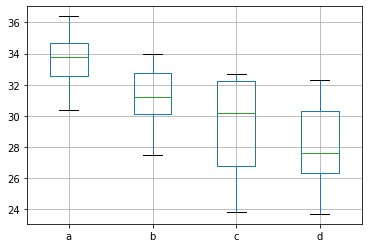

In [69]:
new_df.boxplot(['a', 'b', 'c', 'd'])

#### 1-1) 'a' , 'b', 'c', 'd' 정규성 검정

- H0 : (a, b, c, d)는 정규분포를 따른다. 
- H1 : (a, b, c, d)는 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [53]:
statistic, p = stats.shapiro(new_df['a'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9879404902458191, p-value=0.9835584163665771


In [54]:
statistic, p = stats.shapiro(new_df['b'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9769707918167114, p-value=0.9355478286743164


In [55]:
statistic, p = stats.shapiro(new_df['c'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8929418921470642, p-value=0.33389002084732056


In [70]:
statistic, p = stats.shapiro(new_df['d'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9713903665542603, p-value=0.9016408920288086


- a, b, c, d 모두 p-value가 0.05보다 크므로 귀무가설을 채택한다. a, b, c, d 모두 정규분포를 따른다.

#### 1-2) 등분산성 검정

- a, b, c, d는 등분산성을 따른다.
- a, b, c, d는 등분산성을 따르지 않는다.

(유의수준은 0.05라고 가정)

In [71]:
stats.levene(new_df['a'], new_df['b'], new_df['c'], new_df['d'])

LeveneResult(statistic=0.9417495009041227, pvalue=0.4390899931524723)

- p-value가 0.05보다 크므로 귀무가설을 채택한다. 따라서 a, b, c, d는 등분산성을 따른다.

#### 1-3) ANOVA

- 강종에 따라 2차정련 시간에 차이가 없다. (동일하다)
- 강종에 따라 2차정련 시간에 차이가 있다. (다르다)

(유의수준은 0.05라고 가정)

In [74]:
f_result = stats.f_oneway(new_df['a'], new_df['b'], new_df['c'], new_df['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-Way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

One-Way
F 통계량 : 4.172
p-value : 0.019


- p-value가 0.019로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 강종에 따라 2차정련 시간 평균에 차이가 있다.

### 2) 강종별

In [76]:
df['type'].value_counts()

a    12
b    12
Name: type, dtype: int64

In [77]:
new_df = pd.DataFrame()

In [78]:
new_df['a'] = list(df[df['type'] == 'a'].time.values)
new_df['b'] = list(df[df['type'] == 'b'].time.values)

In [79]:
new_df

,a,b
0,32.2,32.6
1,30.4,32.7
2,33.6,29.3
3,36.4,25.9
4,33.9,31.1
5,34.9,23.8
6,33.1,26.7
7,29.9,28.5
8,31.7,30.9
9,27.5,26.2


<AxesSubplot:>

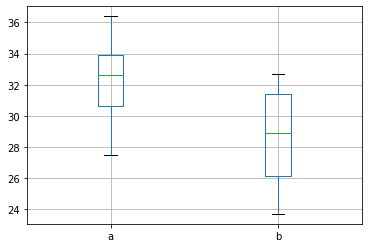

In [80]:
new_df.boxplot(['a', 'b'])

#### 2-1) 'a' , 'b' 정규성 검정

- H0 : (a, b)는 정규분포를 따른다. 
- H1 : (a, b)는 정규분포를 따르지 않는다.

(유의수준은 0.05라고 가정)

In [81]:
statistic, p = stats.shapiro(new_df['a'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9821396470069885, p-value=0.9907689690589905


In [82]:
statistic, p = stats.shapiro(new_df['b'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9098271131515503, p-value=0.2122616022825241


- a, b 모두 p-value가 0.05보다 크므로 귀무가설을 채택한다. a, b 모두 정규분포를 따른다.

#### 2-2) 등분산성 검정

- a, b는 등분산성을 따른다.
- a, b는 등분산성을 따르지 않는다.

(유의수준은 0.05라고 가정)

In [84]:
stats.levene(new_df['a'], new_df['b'])

LeveneResult(statistic=2.1557191195451235, pvalue=0.1561933555382328)

- p-value가 0.05보다 크므로 귀무가설을 채택한다. 따라서 a, b는 등분산성을 따른다.

#### 2-3) ANOVA

- type에 따라 2차정련 시간에 차이가 없다. (동일하다)
- type에 따라 2차정련 시간에 차이가 있다. (다르다)

(유의수준은 0.05라고 가정)

In [85]:
f_result = stats.f_oneway(new_df['a'], new_df['b'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-Way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

One-Way
F 통계량 : 9.654
p-value : 0.005


- p-value가 0.005로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. type에 따라 2차정련 시간 평균에 차이가 있다.

# 330 page

- H0 : 초코칩의 강도와 반죽온도간에 상관계수는 0이다.
- H1 : 초코칩의 강도와 반죽온도간에 상관계수는 0이 아니다.

(유의수준은 0.05라고 가정)

In [86]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9,
      37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 
      18, 13, 15, 17, 14, 16, 20, 21]

In [87]:
corr, pval = stats.pearsonr(df1, df2)

In [88]:
print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


- p-value가 0.00으로 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 초코칩의 강도와 반죽온도간에 상관계수는 0이 아니다. 또한 초코칩의 강도와 반죽온도간에 '강한 음의 상관성'이 있다고 할 수 있다.